In [2]:
!pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/a9/42/f6149550b2b6916bc2073e5eb28dd8160b097eead8282a3958f02a065c12/fiona-1.9.6-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 846.7 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/2a/fb/e3f72b10a90e26bb1a92a38b3f30f3074ebac6d532f87848ac09c3e8a73b/shapely-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for clic

In [4]:
!pip install cufflinks


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 1.3 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for colorlover>=0.2.1 from https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl.metadata
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67901 sha256=1b17aa5c8d9add5c180d5962e4a7907c72f96bfb81d3788fafd4091b89e0106d
  Stored in directory: /Users/shikarichacha/Library/Caches/pip/wheels/c3/bf/8f/afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.0 MB/s eta 0:00:00a 0:00:01


In [21]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/shikarichacha/Desktop/gssoc24/indian_election_preditiction/Igismap  '):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import os, sys
from collections import defaultdict
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [22]:
vote=pd.read_csv('/Users/shikarichacha/Desktop/gssoc24/indian_election_preditiction /LS_2.0.csv')
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [23]:
vote.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [11]:
vote[vote.SYMBOL.isnull()==True]['NAME'].unique()

array(['NOTA'], dtype=object)

In [24]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [25]:
vote.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [26]:
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [27]:
vote.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

In [28]:
vote.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [29]:
vote[vote['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


In [30]:
vote['ASSETS']=pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES']=pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.NaN:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

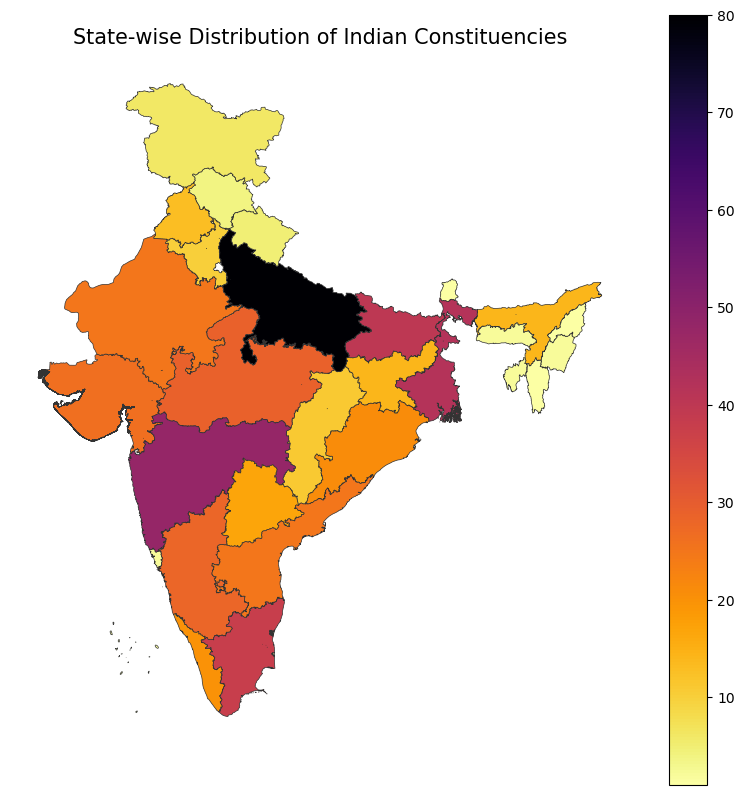

In [34]:
st_con=vote.groupby('STATE').apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name='# Constituency')
shp_gdf = gpd.read_file('/Users/shikarichacha/Desktop/gssoc24/indian_election_preditiction /Igismap/Indian_States.shp')
merged = shp_gdf.set_index('st_nm').join(st_con.set_index('STATE'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='# Constituency', cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
st_con.sort_values(by='# Constituency',ascending=False,inplace=True)
fig2 = px.bar(st_con, x='STATE', y='# Constituency',
                     color='# Constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',template='plotly_dark')
fig2.show()

In [35]:
st_con_vt=vote[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
fig = px.sunburst(st_con_vt, path=['STATE','CONSTITUENCY'], values='TOTAL ELECTORS',
                  color='TOTAL ELECTORS',
                  color_continuous_scale='viridis_r')
fig.update_layout(title_text='Sunburst Image of State and Constituency by Voters',template='plotly_dark')
fig.show()

In [36]:
vote_prty=vote[vote['PARTY']!='NOTA']
prty_cnt=vote_prty.groupby('PARTY').apply(lambda x:x['CONSTITUENCY'].count()).reset_index(name='# Constituency')
prty_st=vote_prty.groupby('PARTY').apply(lambda x:x['STATE'].nunique()).reset_index(name='# State')
prty_cnt.sort_values(by='# Constituency',ascending=False,inplace=True)
prty_top_cn=prty_cnt[:25]
prty_top_all=pd.merge(prty_top_cn,prty_st,how='inner',left_on='PARTY',right_on='PARTY')
fig = px.scatter(prty_top_all, x='# Constituency', y='# State', color='# State',
                 size='# Constituency', hover_data=['PARTY'])
fig.update_layout(title_text='Constituency vs Statewise participation for the most contesting Political Parties',template='plotly_dark')
fig.show()

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

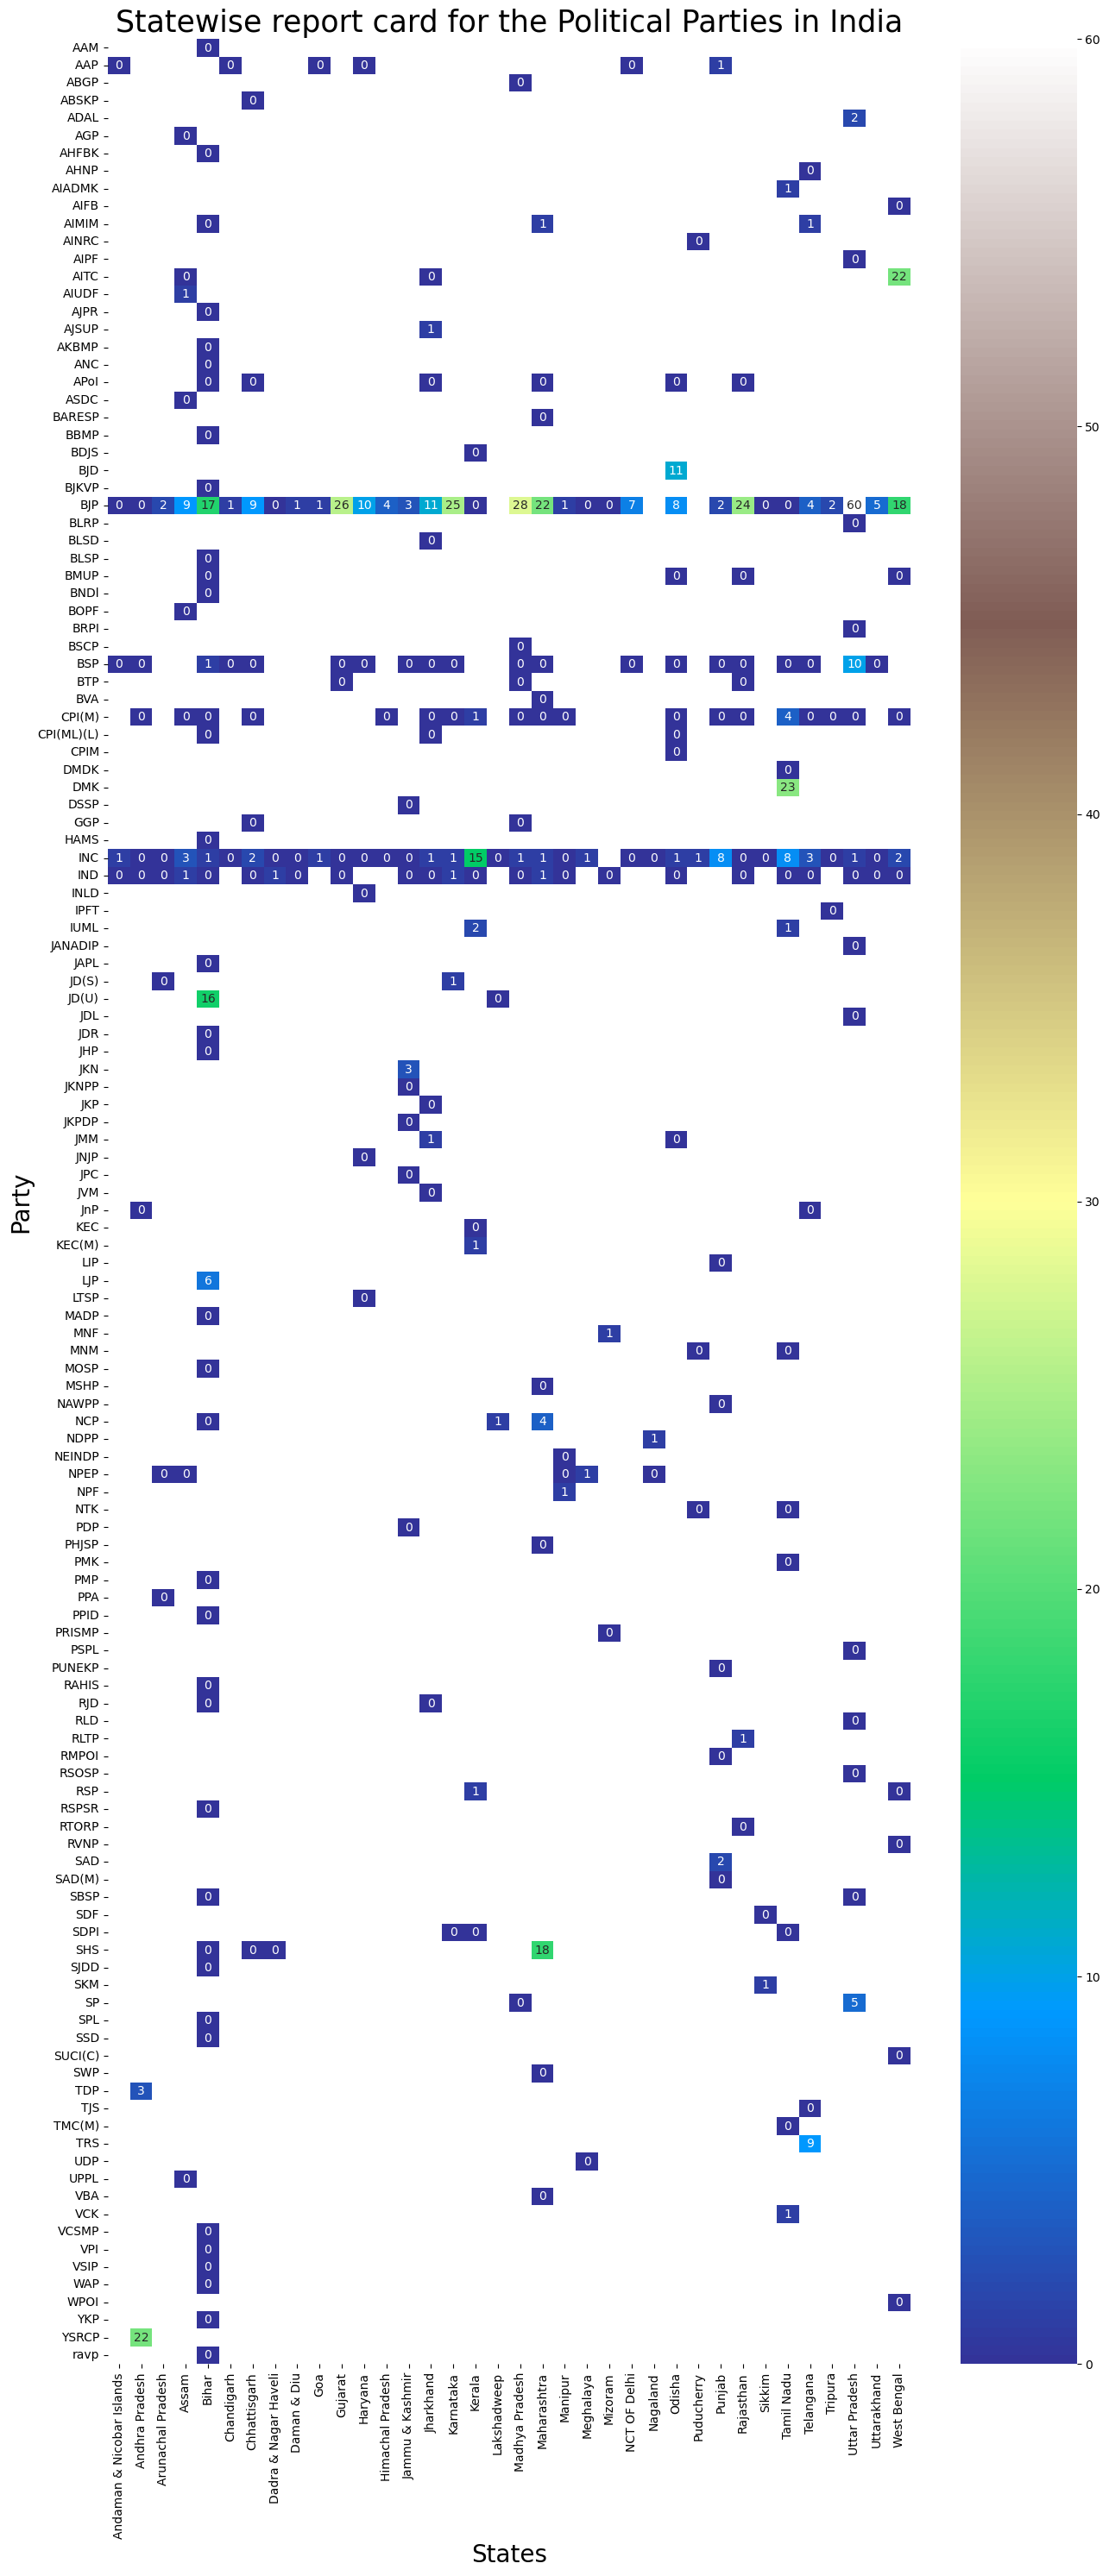

In [37]:

st_prty=vote_prty.groupby(['PARTY','STATE']).apply(lambda x:x['WINNER'].sum()).reset_index(name='Wins')
pvt_st_prty=pd.pivot(st_prty,index='PARTY',columns='STATE',values='Wins')
plt.figure(figsize=(15,35))
sns.heatmap(pvt_st_prty,annot=True,fmt='g',cmap='terrain')
plt.xlabel('States',size=20)
plt.ylabel('Party',size=20)
plt.title('Statewise report card for the Political Parties in India',size=25)

In [38]:
part_win=vote.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending=False,inplace=True)
top_part_win=part_win[0:15]
fig = px.bar(top_part_win, x='PARTY', y='# Wins',
                     color='# Wins',title='Win Counts by a Political Party in 2019')
fig.update_layout(title_text='Win Counts by a Political Party in 2019',template='plotly_dark')
fig.show()

In [39]:
prty_cnt_win=pd.merge(prty_cnt,part_win,how='inner',left_on='PARTY',right_on='PARTY')
prty_cnt_win['Lost']=prty_cnt_win['# Constituency']-prty_cnt_win['# Wins']
prty_wins_cnt=prty_cnt_win[['PARTY','# Wins']]
prty_wins_cnt['Verdict']='Constituency Won'
prty_loss_cnt=prty_cnt_win[['PARTY','Lost']]
prty_loss_cnt['Verdict']='Constituency Lost'
prty_wins_cnt.columns=['Party','Counts','Verdict']
prty_loss_cnt.columns=['Party','Counts','Verdict']
top_prty_wins_cnt=prty_wins_cnt[:15]
prty_loss_cnt_cnt=prty_loss_cnt[:15]
prt_win_loss=pd.concat([top_prty_wins_cnt,prty_loss_cnt_cnt])
fig = px.bar(prt_win_loss, x='Party', y='Counts', color='Verdict')
fig.update_layout(title_text='Win vs Loss Analysis for the Top Parties',template='plotly_dark')
fig.show()

In [40]:
vote_gndr=vote[vote['PARTY']!='NOTA']
gndr_overall=vote_gndr.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_overall['Category']='Overall Gender Ratio'
winners=vote_gndr[vote_gndr['WINNER']==1]
gndr_winner=winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_winner['Category']='Winning Gender Ratio'
gndr_overl_win=pd.concat([gndr_winner,gndr_overall])
fig = px.bar(gndr_overl_win, x='GENDER', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts analysis for the Genders',template='plotly_dark')
fig.show()

In [41]:
ed_valid=vote[vote['PARTY']!="NOTA"]
ed_cnt=ed_valid.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig = go.Figure(data=[go.Pie(labels=ed_cnt['EDUCATION'], values=ed_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.2, 0,0.1, 0.2, 0.1])])
fig.update_layout(title_text='Overall Education Qualification of all the Nominees',template='plotly_dark')
fig.show()
ed_won=ed_valid[ed_valid['WINNER']==1]
ed_win_cnt=ed_won.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig2 = go.Figure(data=[go.Pie(labels=ed_win_cnt['EDUCATION'], values=ed_win_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],title='Education Qualification of the Winners')])
fig2.update_layout(title_text='Education Qualification of the Winners',template='plotly_dark')
fig2.show()

In [42]:
age_cnt=ed_valid.groupby(['AGE','GENDER']).apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(age_cnt, x="AGE",y='Counts',color='GENDER',marginal='violin',title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the politicians',template='plotly_dark')
fig.show()

In [43]:
vote_cat=vote[vote['PARTY']!='NOTA']
cat_overall=vote_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_overall['Category']='Overall Category Counts'
winners_cat=vote_gndr[vote_gndr['WINNER']==1]
cat_winner=winners_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_winner['Category']='Winning Category Ratio'
cat_overl_win=pd.concat([cat_winner,cat_overall])
fig = px.bar(cat_overl_win, x='CATEGORY', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts for the Category in Politics',template='plotly_dark')
fig.show()

In [44]:
crim_cnt=ed_valid.groupby('CRIMINAL CASES').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(crim_cnt, x='CRIMINAL CASES',y='Counts',marginal='violin')
fig.update_layout(title_text='Criminal Cases Counts Distribution among the politicians',template='plotly_dark')
fig.show()

In [45]:
as_liab_name=ed_valid[['NAME','PARTY','ASSETS','LIABILITIES','STATE','CONSTITUENCY','WINNER']]
as_liab_name.WINNER.replace({1:'Yes',0:'No'},inplace=True)
win_as_liab_name=as_liab_name[as_liab_name['WINNER']=='Yes']
win_as_liab_name.sort_values(by='ASSETS',ascending=False,inplace=True)
fig = px.scatter(win_as_liab_name, x='ASSETS', y='LIABILITIES', 
                 color='STATE',size='ASSETS', 
                 hover_data=(['NAME','PARTY','CONSTITUENCY','STATE','WINNER']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

In [46]:
vote_df=vote[vote['PARTY']!='NOTA']
vote_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace=True)
vote_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
i=1
parties_dict={}
for j in vote_df['PARTY']:
    if j in parties_dict:
        continue
    else:
        parties_dict[j]=i
        i+=1
vote_df['PARTY'].replace(parties_dict,inplace=True)
a=1
edu_dict={}
for b in vote_df['EDUCATION']:
    if b in edu_dict:
        continue
    else:
        edu_dict[b]=a
        a+=1
vote_df['EDUCATION'].replace(edu_dict,inplace=True)
df1 = vote_df[['STATE','CONSTITUENCY','WINNER','PARTY','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS','LIABILITIES']]
num_cols = ['PARTY','EDUCATION','CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS','ASSETS','CATEGORY','LIABILITIES','GENDER']
dataset = pd.get_dummies(df1)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaling_columns = num_cols
dataset[scaling_columns] = standardScaler.fit_transform(dataset[scaling_columns])
dataset.head()

,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,...,SYMBOL_Tiller,SYMBOL_Tractor Chalata Kisan,SYMBOL_Triangle,SYMBOL_Truck,SYMBOL_Two Leaves,SYMBOL_Tyres,SYMBOL_Umbrella,SYMBOL_Walking Stick,SYMBOL_Water Melon,SYMBOL_Whistle
0,1,-0.628979,-0.382872,6.620242,-0.023051,2.251127,-1.242514,0.332957,-0.538876,-0.311731,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.583879,-0.382872,-0.190426,0.145491,2.251127,-0.872637,0.103781,-0.538876,-0.274420,...,False,False,False,False,False,False,False,False,False,False
2,0,-0.538780,-0.382872,0.202498,-0.023051,2.251127,-1.242514,0.085873,-0.538876,-0.230717,...,False,False,False,False,False,False,False,False,False,False
4,1,-0.628979,-0.382872,0.464446,0.482577,0.816718,-0.502761,1.387657,0.876978,-0.139047,...,False,False,False,False,False,False,False,False,False,False
5,0,-0.493681,-0.382872,-0.190426,-0.444408,0.816718,-0.872637,0.559766,0.876978,0.005336,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df_not_winner = dataset[dataset.WINNER == 0]
df_winner = dataset[dataset.WINNER == 1]
df_winner_upsampled = resample(df_winner, replace = True,n_samples = 1452, random_state = 0) 
df_total_upsampled = pd.concat([df_not_winner, df_winner_upsampled])
df_total_upsampled.WINNER.value_counts()
y = df_total_upsampled['WINNER']
X = df_total_upsampled.drop(['WINNER'], axis = 1)
rf_scores = []
for k in range(1,60):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rf_scores.append(score.mean())
fig=px.scatter(x=[k for k in range(1, 60)],y= rf_scores,color=rf_scores,size=rf_scores)
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

In [48]:
randomforest_classifier= RandomForestClassifier(n_estimators=38,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 96.1449
